In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
#load data set and perform initial inspection
df = pd.read_csv('forex_predictions_data.csv')

#more initial inspections
df.head()
df.info()

#statistical inspections
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [5]:
#Handling bad data:
#empty values
#check for null values
print('Missing values')
df.isnull().sum()

Missing values


Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

In [6]:
#Handling missing values
#create an array to store our data
numeric_cols = ['Open','High','Low','Close','Volume','Predicted_Close','Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col],errors='coerce')# convert to numeric ,coerce errors to NaN
        #fill NaN values with mean of column
        df[col]= df[col].fillna(df[col].median())
#categorical columns, we fill missing values with mode
categorical_cols = ['Signal'] 
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
print('Check again for missing values')
print(df.isnull().sum())
        
        
        
               


Check again for missing values
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [11]:
#data in wrong format
#convert date column to datetime format
df['Date']= pd.to_datetime(df['Date'], errors= 'coerce')

#Handle volume column with errors values
df['Volume']= pd.to_numeric(df['Volume'],errors='coerce') #convert to numeric coercing errors to NaN

#fill nan values in volume with median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())

#clean confidence column
df['Confidence']= pd.to_numeric(df['Confidence'], errors = 'coerce')
#fill nan values in confidence with median
df['Confidence'] = df['Confidence'].fillna(df['Confidence']. median())


In [12]:
#wrong data type
price_cols = ['Open','High', 'Low', 'Close', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
        #Remove extreme outliers (beyond 3 std)
        mean = df[col].mean()
        std= df[col].std()    
        
        df[col]= np.where((df[col] < mean - 3* std) | (df[col]> mean + 3*std), np.nan , df[col])
        df[col]= df[col].fillna(df[col]. median())
        

In [13]:
#Duplicate
#ceck duplicate
print('Number of duplicate rows:',df.duplicated().sum())


Number of duplicate rows: 10


In [15]:
#remove duplicate
df = df.drop_duplicates()
print('Number of rows after removing duplicates:',df.shape[0])
#check for duplicate date
print('Number of duplicate dates:',df['Date'].duplicated().sum())
#remove duplicate dates
df= df.drop_duplicates(subset=['Date'], keep='first')

#shape
df.shape


Number of rows after removing duplicates: 219
Number of duplicate dates: 2


(217, 10)

In [16]:
#final clean dataset
df.info()
#check for empty values after all cleaning
print('Missing values after all cleaning:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             216 non-null    datetime64[ns]
 1   Open             217 non-null    float64       
 2   High             217 non-null    float64       
 3   Low              217 non-null    float64       
 4   Close            217 non-null    float64       
 5   Volume           217 non-null    float64       
 6   Predicted_Close  217 non-null    float64       
 7   Currency_Pair    217 non-null    object        
 8   Signal           217 non-null    object        
 9   Confidence       217 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.6+ KB
Missing values after all cleaning:
Date               1
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_P

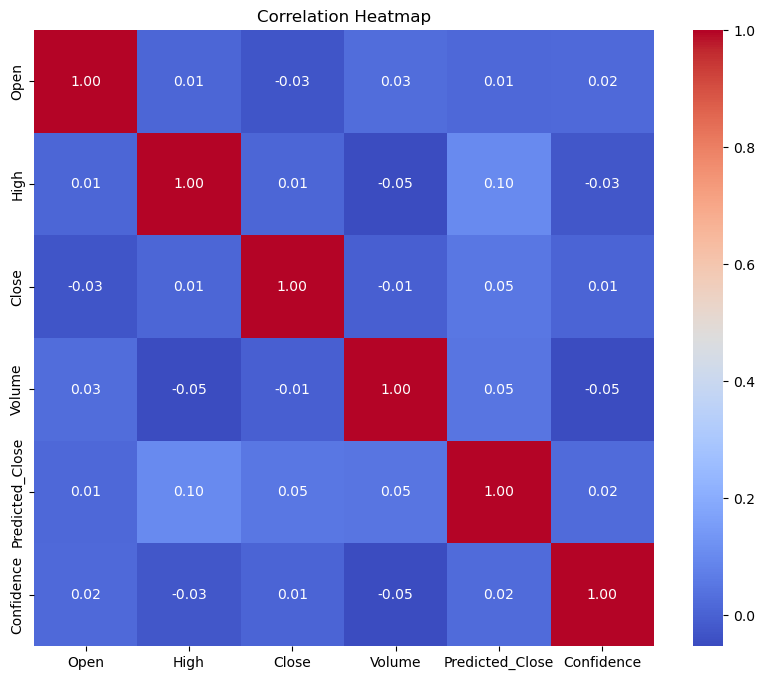

In [19]:
#Analysis
#Correlation Analysis
#calculate correlation matrix
corr_matrix = df[['Open','High','Close','Volume', 'Predicted_Close','Confidence']].corr()
 
 #plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f', linewidths=0)
plt.title('Correlation Heatmap')
plt.show()

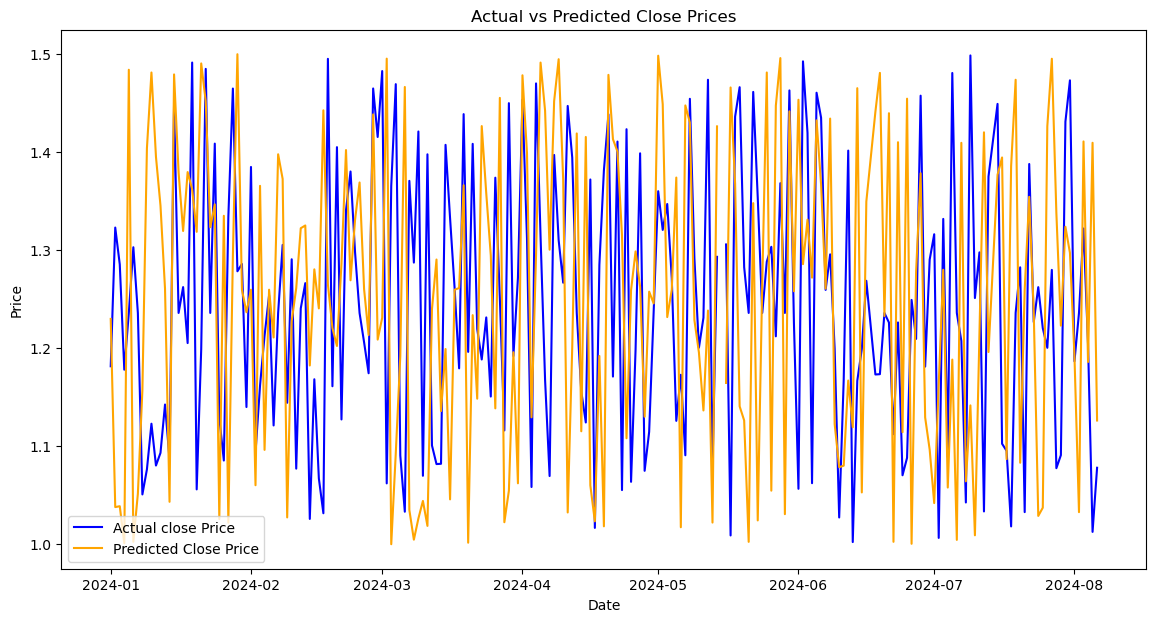

In [21]:
#Actual vs Predicted close prices
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'],label= 'Actual close Price',color='blue')
plt.plot(df['Date'],df['Predicted_Close'],label= 'Predicted Close Price',color= 'orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()


Text(0.5, 0, 'Signal Type')

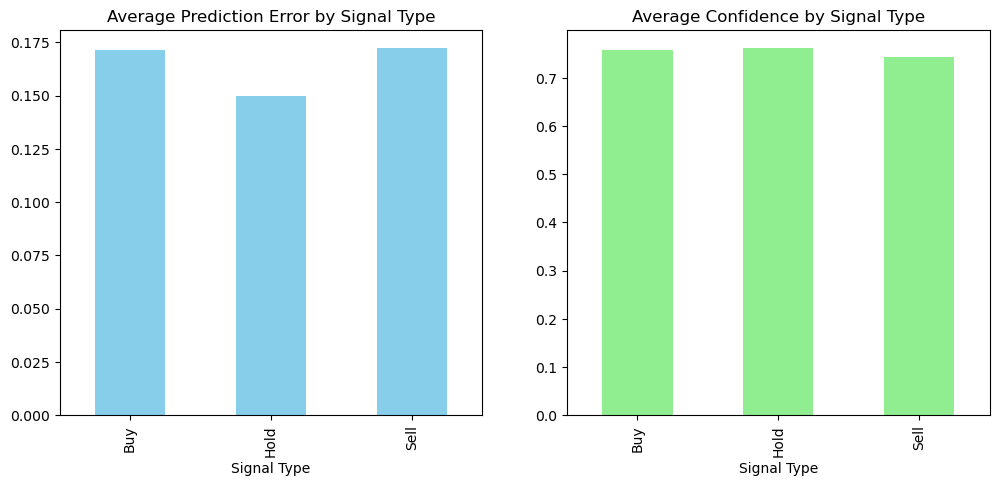

In [22]:
#signal Performance Analysis
df['Prediction_Error']=abs(df['Close'] - df['Predicted_Close'])

#Analyze error by signal type
signal_error=df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()

#plotting the average prediction error by signal type
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
signal_error.plot(kind='bar',color='skyblue')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')

#plotting the average confidence by Signal type
plt.subplot(1,2,2)
signal_confidence.plot(kind='bar',color='lightgreen')
plt.title('Average Confidence by Signal Type') 
plt.xlabel('Signal Type')

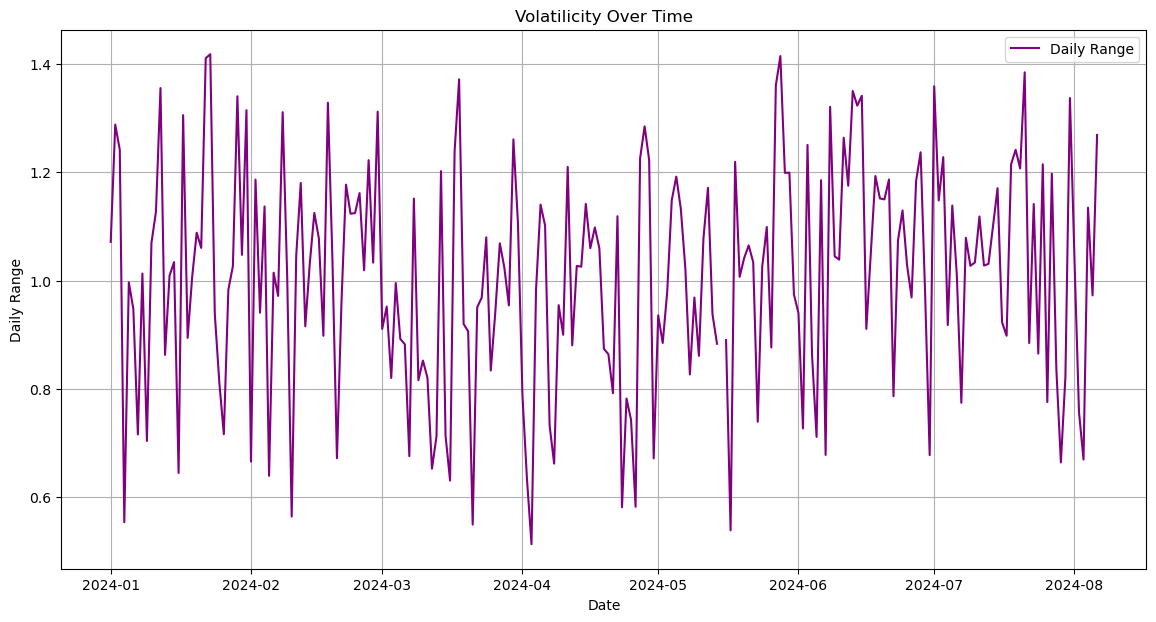

In [23]:
#Volitility Analysis
#calculate daily returns 
df['Daily_Range'] = df['High'] - df['Low']

#plot volatility over time
plt.figure(figsize=(14,7))
plt.plot(df['Date'],df['Daily_Range'],label='Daily Range', color= 'purple')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.title('Volatilicity Over Time')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Key findings

# 1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
# 2. The correlation analysis shows strong relationships between the price columns, particularly between 'Open', 'High', 'Low', and 'Close'.
# 3. The actual vs predicted close prices plot indicates that the model performs reasonably well, but there are some discrepancies.
# 4. The signal performance analysis shows that the average prediction error varies by signal type, with 'Buy' signals generally having lower errors.
# 5. The volatility analysis indicates fluctuations in the daily range, which can be useful for understanding market behavior.
# 6. The cleaned and processed data is ready for further analysis or modeling.
# Save the cleaned and processed data for future use


#Price correlation analysis

# Recemmendations for future work
# 1. Model Improvement: Explore more advanced machine learning models or deep learning techniques to improve prediction accuracy.
# 2. Feature Engineering: Create additional features that may capture market dynamics better, such as technical indicators (e.g., moving averages, RSI).
# 3. Time Series Analysis: Implement time series analysis techniques to capture trends and seasonality in the data.
# 4. Backtesting: Implement a backtesting framework to evaluate the performance of trading strategies based on the predictions.
# 5. Real-time Data Integration: Consider integrating real-time data feeds to make predictions on live market conditions.
# 6. Model Deployment: Explore options for deploying the model in a production environment for real-time